In [ ]:
import pandas as pd
import numpy as np
diab=pd.read_csv("/content/drive/MyDrive/PGP Datasets/diabetes (1).csv")

In [ ]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'
featurs_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness'	,'Insulin',	'BMI','DiabetesPedigreeFunction','Age']
x=diab[featurs_cols]
y=diab.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100)

In [ ]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2      197             70             99        0  34.7   
46             1      146             56              0        0  29.7   
508            2       84             50             23       76  30.4   
384            1      125             70             24      110  24.3   
163            2      100             64             23        0  29.7   
..           ...      ...            ...            ...      ...   ...   
578           10      133             68              0        0  27.0   
53             8      176             90             34      300  33.7   
350            4       92             80              0        0  42.2   
79             2      112             66             22        0  25.0   
520            2       68             70             32       66  25.0   

     DiabetesPedigreeFunction  Age  
579                     0.575   62  
46                      0.564   29  


In [ ]:
print(y_train)

579    1
46     0
508    0
384    0
163    0
      ..
578    0
53     1
350    0
79     0
520    0
Name: Outcome, Length: 576, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [ ]:
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.6510416666666666


[Text(0.53359375, 0.9722222222222222, 'X[1] <= 123.5\nentropy = 0.936\nsamples = 576\nvalue = [373, 203]'),
 Text(0.208203125, 0.9166666666666666, 'X[5] <= 26.95\nentropy = 0.641\nsamples = 332\nvalue = [278, 54]'),
 Text(0.195703125, 0.8611111111111112, 'entropy = 0.0\nsamples = 104\nvalue = [104, 0]'),
 Text(0.220703125, 0.8611111111111112, 'X[7] <= 28.5\nentropy = 0.79\nsamples = 228\nvalue = [174, 54]'),
 Text(0.0875, 0.8055555555555556, 'X[4] <= 91.0\nentropy = 0.406\nsamples = 111\nvalue = [102, 9]'),
 Text(0.075, 0.75, 'X[1] <= 111.5\nentropy = 0.539\nsamples = 73\nvalue = [64, 9]'),
 Text(0.0375, 0.6944444444444444, 'X[7] <= 24.5\nentropy = 0.367\nsamples = 57\nvalue = [53, 4]'),
 Text(0.025, 0.6388888888888888, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.05, 0.6388888888888888, 'X[4] <= 84.5\nentropy = 0.722\nsamples = 20\nvalue = [16, 4]'),
 Text(0.0375, 0.5833333333333334, 'X[1] <= 106.5\nentropy = 0.503\nsamples = 18\nvalue = [16, 2]'),
 Text(0.025, 0.527777777

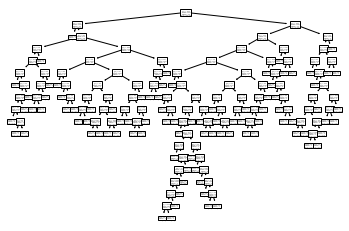

In [ ]:
fom sklearn import tree
tree.plot_tree(dt)

In [ ]:
y_pred_train=dt.predict(x_train)
print('accuracy:',metrics.accuracy_score(y_train,y_pred_train))

accuracy: 1.0


In [ ]:
#overfitting is when the model is performing differently on training dataset and unseen dataset
#It occurs when the evaluation of training and testing dataset differs
#noise is the irrelevant data that is affecting the performance of the model

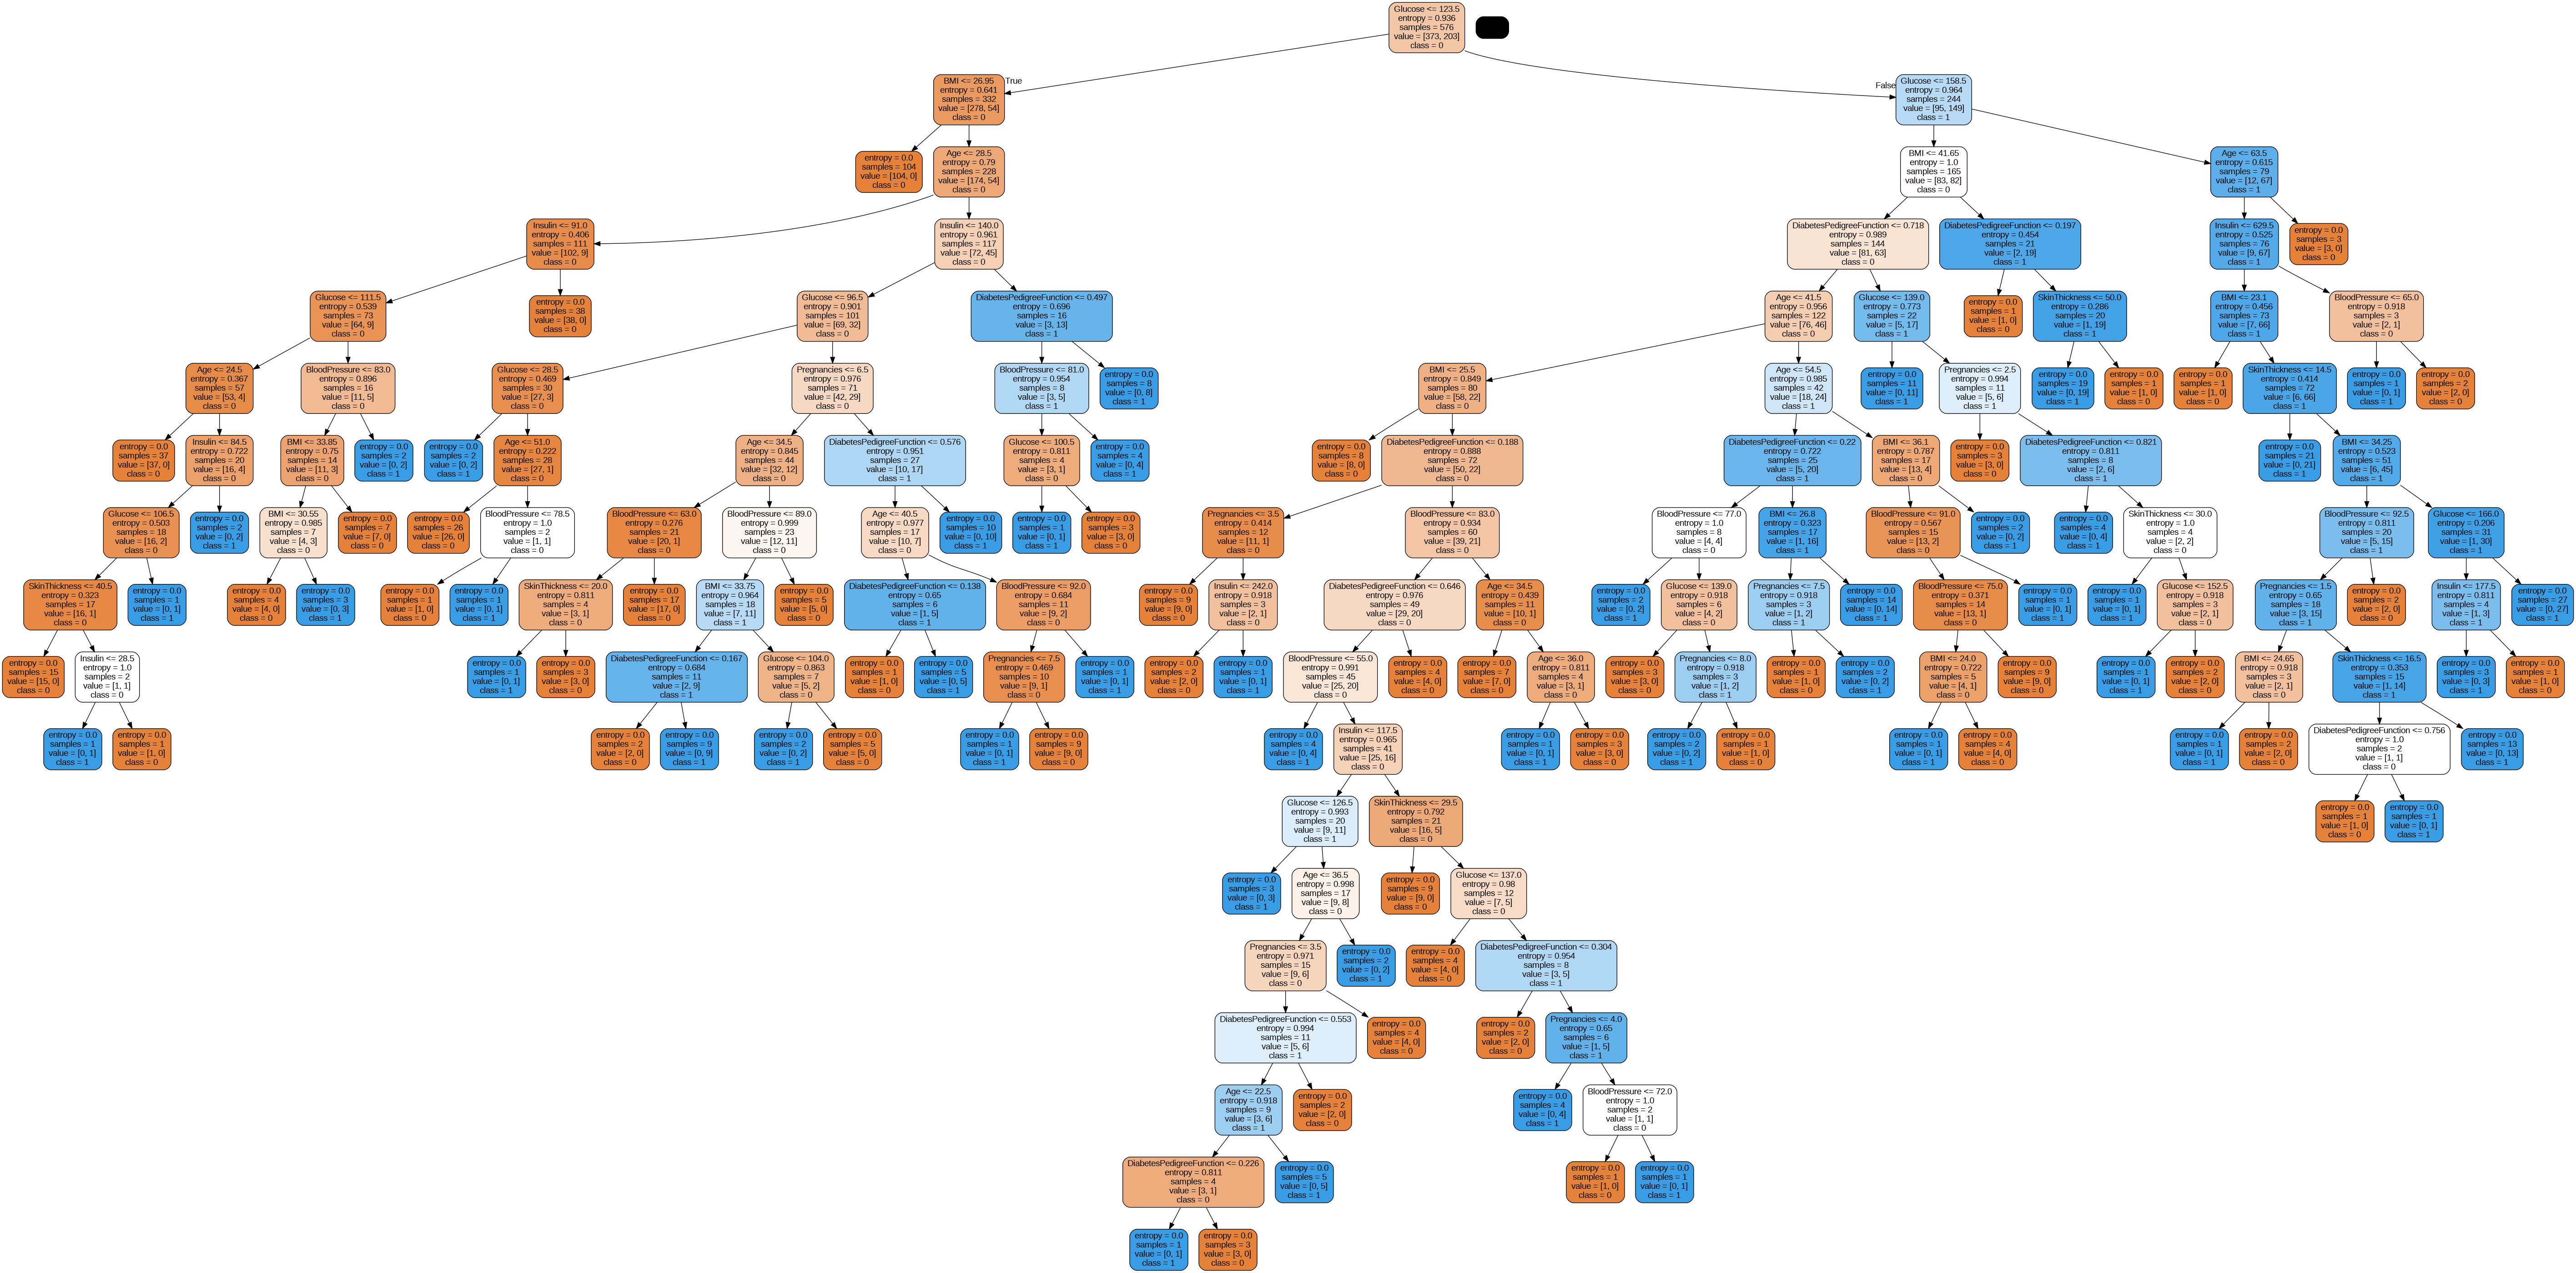

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
out_dat=StringIO()
export_graphviz(dt,out_file=out_dat,filled='True',feature_names=featurs_cols,class_names=['0','1'],rounded='True')
graph=pydotplus.graph_from_dot_data(out_dat.getvalue())
graph.write_png("d1.png")
Image(graph.create_png())

In [ ]:
#1 - train test split 10:90
scores=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.9,random_state=100)
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
scores.append(metrics.accuracy_score(y_test,y_pred))
print('accuracy:',scores[0])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=100)
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
scores.append(metrics.accuracy_score(y_test,y_pred))
print('accuracy:',scores[1])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=100)
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
scores.append(metrics.accuracy_score(y_test,y_pred))
print('accuracy:',scores[2])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=100)
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
scores.append(metrics.accuracy_score(y_test,y_pred))
print('accuracy:',scores[3])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=100)
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
scores.append(metrics.accuracy_score(y_test,y_pred))
print('accuracy:',scores[4])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=100)
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
scores.append(metrics.accuracy_score(y_test,y_pred))
print('accuracy:',scores[5])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
scores.append(metrics.accuracy_score(y_test,y_pred))
print('accuracy:',scores[6])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
scores.append(metrics.accuracy_score(y_test,y_pred))
print('accuracy:',scores[7])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=100)
clf=DecisionTreeClassifier(criterion="entropy")
dt=clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
scores.append(metrics.accuracy_score(y_test,y_pred))
print('accuracy:',scores[8])

accuracy: 0.7210982658959537
accuracy: 0.6520325203252032
accuracy: 0.7118959107806692
accuracy: 0.7114967462039046
accuracy: 0.6796875
accuracy: 0.7142857142857143
accuracy: 0.696969696969697
accuracy: 0.6688311688311688
accuracy: 0.6493506493506493
